In [1]:
import healpy as hp
import numpy as np
import pyfits as pf
import matplotlib.pyplot as plt
import healconv as hc
%matplotlib inline

In [12]:
beam={}
head={}
bdir='/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/beams/'
for d in [5,6,7,8]:
    for ab in ['a','b']:
        id=str(d)+str(ab)
        f=pf.open(bdir+"HFI_ScanBeam_217-"+id+"_R2.00.fits")        
        beam[id]=f[0].data/f[0].data.sum() ## we want to normalize so that the sum is one
        head[id]=f[0].header

In [13]:
Tbeam=beam['5a'] # test beam
Qbeam=0.5*((beam['5a']-beam['5b'])+(beam['6a']-beam['6b']))
Ubeam=0.5*((beam['7a']-beam['7b'])+(beam['8a']-beam['8b']))
## Now symmetrise wrt to y
Qbeam=0.5*(Qbeam+Qbeam[:,::-1])
Ubeam=0.5*(Ubeam+Ubeam[:,::-1])

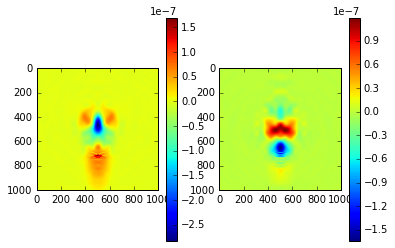

In [14]:
plt.subplot(1,2,1)
plt.imshow(Qbeam[2500:3500,2500:3500])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(Ubeam[2500:3500,2500:3500])
plt.colorbar()

In [27]:
Navg=4
def bavg (m,N):
    No=len(m)/N
    out=np.zeros((No,No))
    for i in range(No):
            for j in range(No):
                    out[i,j]=m[N*i:N*(i+1),N*j:N*(j+1)].sum()
    return out
Qbeam_s=bavg(Qbeam[:,:],Navg)
Ubeam_s=bavg(Ubeam[:,:],Navg)
Tbeam_s=bavg(Tbeam[:,:],Navg)

In [31]:
Tbeam_s.sum()
Tbeam_s.shape

(1500, 1500)

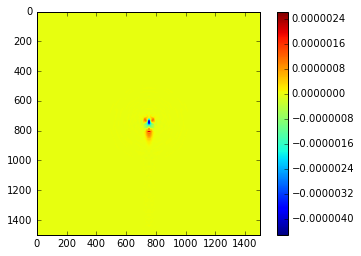

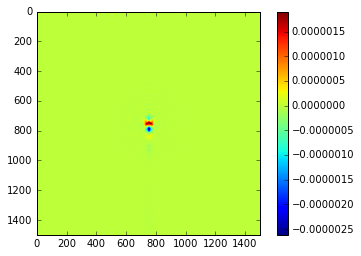

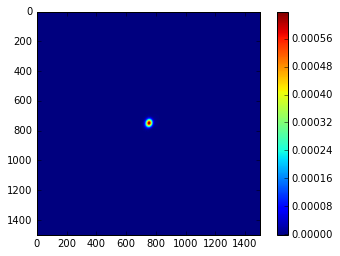

In [30]:
plt.figure()
plt.imshow(Qbeam_s)
plt.colorbar()
plt.figure()
plt.imshow(Ubeam_s)
plt.colorbar()
plt.figure()
plt.imshow(Tbeam_s)
plt.colorbar()

In [17]:
np.pi/(head['6b']['DELTAX']*100) ## ok, it must be in radians then

3240.0000000002406

In [18]:
Tmape=hp.read_map("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/real/HFI_SkyMap_217_512dg_R2.02_full_ECL.fits")

NSIDE = 512
ORDERING = RING in fits file
INDXSCHM = IMPLICIT


0.999999974554
989
989 978121
False
0 / 12288 0
[[ -7.12444809e-11 +0.00000000e+00j  -6.65189463e-06 -5.21862579e-09j
   -2.46205790e-05 -3.90497020e-08j]
 [  7.63668170e-05 +2.03743411e-04j   6.96516340e-05 +2.03577129e-04j
    5.17456695e-05 +2.02962218e-04j]
 [  1.93069564e-04 +2.77949641e-04j   1.86617211e-04 +2.77784005e-04j
    1.69452704e-04 +2.77005909e-04j]]


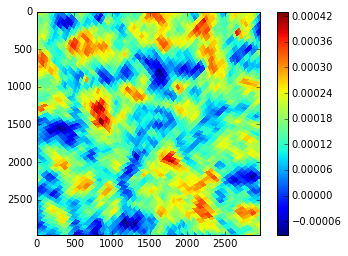

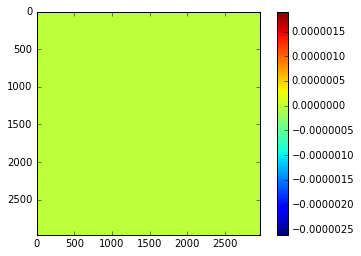

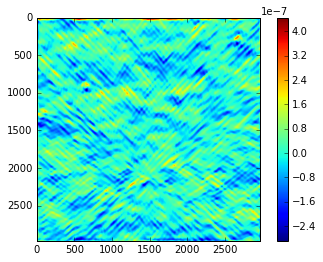

In [33]:
## we now do the convolution
reload(hc)
print Tbeam_s.sum()
Qleak=hc.healconvolve(Tmape,Ubeam_s,head['5a']['DELTAX']*Navg,32,1.2,debug=3, MPI=None)

In [35]:
np.save("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/beams/TestBeam5A_217",Tbeam_s)
np.save("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/beams/UBeam_217",Ubeam_s)
np.save("/gpfs/mnt/gpfs01/astro/workarea/csheehy/planckmaps/beams/QBeam_217",Qbeam_s)
print "DX=",head['5a']['DELTAX']*Navg

DX= 3.87850944888e-05
